In [1]:
!pip install geopy
!conda install -c conda-forge folium=0.5.0 --yes 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium

     |████████████████████████████████| 111 kB 1.1 MB/s eta 0:00:01
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
  - anaconda/osx-64::ca-certificates-2020.6.24-0, anaconda/osx-64::certifi-2020.6.20-py38_0, anaconda/osx-64::openssl-1.1.1g-h1de35cc_0
  - anaconda/osx-64::ca-certificates-2020.6.24-0, anaconda/osx-64::openssl-1.1.1g-h1de35cc_0, defaults/osx-64::certifi-2020.6.20-py38_0
  - anaconda/osx-64::certifi-2020.6.20-py38_0, anaconda/osx-64::openssl-1.1.1g-h1de35cc_0, defaults/osx-64::ca-certificates-2020.6.24-0
  - anaconda/osx-64::openssl-1.1.1g-h1de35cc_0, defaults/osx-64::ca-certificates-2020.6.24-0, defaults/osx-64::certifi-2020.6.20-py38_0
  - anaconda/osx-64::certifi-2020.6.20-py38_0, defaults/osx-64::ca-certificates-2020.6.24-0, defaults/osx-64::openssl-1.1.1g-h1de35cc_0
  - defaults/osx-64::ca-certificates-2020.6.24-0, defaults/osx-64::certifi-2020.6.20-py38_0, defaults/osx-64::openssl-1.1.1g-h1de35cc_0
  - ana

In [2]:
paris_data = pd.read_csv("https://lvdesign.com.fr/coursera_data/paris.csv")
paris_data

,Lieux,Latitude,Longitude
0,Musée du Louvre,48.860611,2.335450
1,Notre Dame de Paris,48.852968,2.347708
2,Arc de Triomphe,48.873792,2.295028
3,Tour Eiffel,48.858370,2.294481


In [4]:
address = 'Paris, FR'

geolocator = Nominatim(user_agent="Week5_Assignment")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8370937, 2.2793363.


In [5]:
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Lieux']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

In [6]:
CLIENT_ID = 'XDP05EROIGY2VHJ3RZNRVGCEECJKCBAV0L4JMC4F4SCL0NAF' # your Foursquare ID
CLIENT_SECRET = 'XHKK22SSQYX0REMVWFGNG3GTY5I2HGPPOUERFOEFPIR0YPNO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XDP05EROIGY2VHJ3RZNRVGCEECJKCBAV0L4JMC4F4SCL0NAF
CLIENT_SECRET:XHKK22SSQYX0REMVWFGNG3GTY5I2HGPPOUERFOEFPIR0YPNO


In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Lieux', 
                  'Lieux Latitude', 
                  'Lieux Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'
                             
                   ]
    
    return(nearby_venues)

In [8]:
venue_id ={
    'Musée du Louvre': '4adcda10f964a520af3521e3',
    'Cathédrale Notre-Dame de Paris': '4adcda09f964a520e83321e3',
    'Tour Eiffel': '51a2445e5019c80b56934c75',
    'Arc de Triomphe': '4adcda09f964a520de3321e3'
}

for key,value in venue_id.items():
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(value, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        print('Venue :', key)
        print('Rating : ', result['response']['venue']['rating'])
        print('Total Tips : ', result['response']['venue']['tips']['count'])
        print('Nb Likes : ', result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])
        print('Nb Likes / Total Tips', (result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])/ (result['response']['venue']['tips']['count']) *100 )
        
        print()

    except:
        print('This venue has not been rated yet.')

Venue : Musée du Louvre
Rating :  9.3
Total Tips :  2272
Nb Likes :  167
Nb Likes / Total Tips 7.350352112676056

Venue : Cathédrale Notre-Dame de Paris
Rating :  9.4
Total Tips :  979
Nb Likes :  57
Nb Likes / Total Tips 5.822267620020429

Venue : Tour Eiffel
Rating :  9.4
Total Tips :  2648
Nb Likes :  933
Nb Likes / Total Tips 35.23413897280967

Venue : Arc de Triomphe
Rating :  9.4
Total Tips :  780
Nb Likes :  102
Nb Likes / Total Tips 13.076923076923078



In [9]:
paris_data_venues = getNearbyVenues(names=paris_data['Lieux'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )
paris_data_venues

Musée du Louvre
Notre Dame de Paris
Arc de Triomphe
Tour Eiffel


,Lieux,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Musée du Louvre,48.860611,2.335450,Musée du Louvre,4adcda10f964a520af3521e3,48.860847,2.336440,Art Museum
1,Musée du Louvre,48.860611,2.335450,La Vénus de Milo (Vénus de Milo),5864efb745c3ed1e7d88e96d,48.859943,2.337234,Exhibit
2,Musée du Louvre,48.860611,2.335450,Vestige de la Forteresse du Louvre,4f6dabf5003944083fe0002e,48.861577,2.333508,Historic Site
3,Musée du Louvre,48.860611,2.335450,Cour Napoléon,5072efe7e4b0c34b5146e7fd,48.861172,2.335088,Plaza
4,Musée du Louvre,48.860611,2.335450,Cour Carrée du Louvre,4c079d740ed3c928b6be797d,48.860360,2.338543,Pedestrian Plaza
5,Musée du Louvre,48.860611,2.335450,Place du Palais Royal,4b071505f964a520dcf622e3,48.862523,2.336688,Plaza
6,Musée du Louvre,48.860611,2.335450,모나리자 / 라 조콘다 (Mona Lisa | La Joconde),56f279c4cd10850a585f5e31,48.860139,2.335337,Exhibit
7,Musée du Louvre,48.860611,2.335450,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",588ba9a9fc5a5f18a36a2a05,48.860724,2.332121,Art Museum
8,Musée du Louvre,48.860611,2.335450,Carrousel du Louvre,4adcda1df964a5202e3921e3,48.861642,2.334217,Shopping Mall
9,Musée du Louvre,48.860611,2.335450,Pont des Arts,4adcda09f964a520ff3321e3,48.858565,2.337635,Bridge


In [10]:
df_view_new = paris_data_venues.groupby('Lieux').count()
df_paris_histo = df_view_new['Venue Category']
df_paris_histo

Lieux
Arc de Triomphe        73
Musée du Louvre        71
Notre Dame de Paris    82
Tour Eiffel            49
Name: Venue Category, dtype: int64

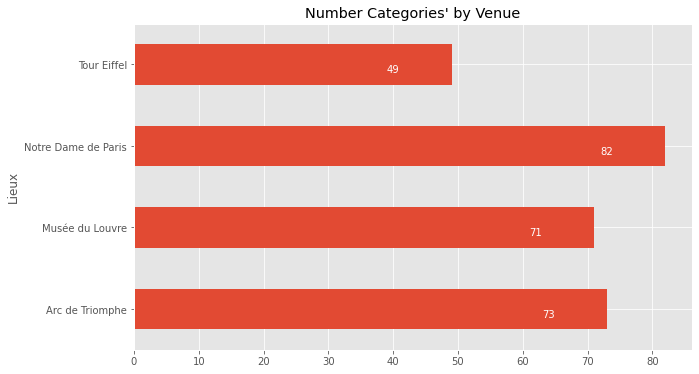

In [12]:
df_paris_histo.plot(kind='barh', figsize=(10,6))

#plt.xlabel('name') # add to x-label to the plot
#plt.ylabel('Number de categories') # add y-label to the plot
plt.title('Number Categories\' by Venue') # add title to the plot

for index, value in enumerate(df_paris_histo): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 10, index - 0.10), color='white')
    
plt.show()

In [13]:
paris_onehot = pd.get_dummies(paris_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add Lieux column back to dataframe
paris_onehot['Lieux'] = paris_data_venues['Lieux'] 

# move lieux column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Lieux,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bar,Basketball Court,Basque Restaurant,Beach Bar,Bistro,Bookstore,Boutique,Brasserie,Breton Restaurant,Bridge,Burger Joint,Café,Candy Store,Cantonese Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Falafel Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Government Building,Historic Site,History Museum,Hotel,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lebanese Restaurant,Library,Lounge,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant
0,Musée du Louvre,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Musée du Louvre,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
paris_grouped = paris_onehot.groupby('Lieux').mean().reset_index()
paris_grouped

,Lieux,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bar,Basketball Court,Basque Restaurant,Beach Bar,Bistro,Bookstore,Boutique,Brasserie,Breton Restaurant,Bridge,Burger Joint,Café,Candy Store,Cantonese Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Falafel Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Government Building,Historic Site,History Museum,Hotel,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lebanese Restaurant,Library,Lounge,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant
0,Arc de Triomphe,0.000000,0.000000,0.000000,0.013699,0.013699,0.027397,0.013699,0.000000,0.000000,0.000000,0.027397,0.000000,0.013699,0.000000,0.013699,0.000000,0.00000,0.013699,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027397,0.013699,0.013699,0.013699,0.00000,0.000000,0.013699,0.013699,0.000000,0.000000,0.000000,0.027397,0.000000,0.000000,0.00000,0.000000,0.178082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150685,0.000000,0.000000,0.068493,0.027397,0.000000,0.013699,0.000000,0.013699,0.013699,0.000000,0.00000,0.000000,0.013699,0.013699,0.00000,0.000000,0.013699,0.000000,0.013699,0.027397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.013699,0.000000,0.000000,0.000000,0.013699,0.013699,0.027397,0.013699,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.027397,0.000000,0.013699,0.000000,0.000000,0.013699,0.000000,0.000000,0.013699,0.00000,0.000000,0.000000,0.000000,0.013699
1,Musée du Louvre,0.014085,0.042254,0.014085,0.000000,0.000000,0.000000,0.028169,0.000000,0.000000,0.000000,0.014085,0.014085,0.014085,0.014085,0.000000,0.014085,0.00000,0.028169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.014085,0.000000,0.056338,0.000000,0.00000,0.000000,0.028169,0.000000,0.000000,0.014085,0.000000,0.000000,0.028169,0.000000,0.00000,0.000000,0.140845,0.014085,0.014085,0.000000,0.014085,0.042254,0.000000,0.098592,0.000000,0.000000,0.042254,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.014085,0.000000,0.014085,0.014085,0.000000,0.000000,0.070423,0.000000,0.014085,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.014085,0.00000,0.014085,0.014085,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.014085,0.000000,0.000000,0.00000,0.000000,0.000000,0.014085,0.000000
2,Notre Dame de Paris,0.000000,0.000000,0.012195,0.012195,0.000000,0.024390,0.036585,0.000000,0.012195,0.000000,0.036585,0.048780,0.000000,0.012195,0.000000,0.000000,0.02439,0.012195,0.000000,0.012195,0.000000,0.012195,0.000000,0.012195,0.012195,0.000000,0.024390,0.036585,0.000000,0.02439,0.000000,0.000000,0.012195,0.000000,0.000000,0.012195,0.000000,0.000000,0.012195,0.02439,0.012195,0.060976,0.000000,0.012195,0.000000,0.000000,0.012195,0.012195,0.048780,0.012195,0.036585,0.000000,0.036585,0.012195,0.000000,0.012195,0.000000,0.000000,0.000000,0.02439,0.000000,0.000000,0.012195,0.02439,0.0121

## Top 10 Most Common venues

In [15]:
num_top_venues = 10

for hood in paris_grouped['Lieux']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Lieux'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arc de Triomphe----
                 venue  freq
0    French Restaurant  0.18
1                Hotel  0.15
2   Italian Restaurant  0.07
3       Clothing Store  0.03
4        Movie Theater  0.03
5               Bakery  0.03
6           Steakhouse  0.03
7    Electronics Store  0.03
8               Bistro  0.03
9  Japanese Restaurant  0.03


----Musée du Louvre----
                venue  freq
0   French Restaurant  0.14
1               Hotel  0.10
2               Plaza  0.07
3         Coffee Shop  0.06
4          Art Museum  0.04
5  Italian Restaurant  0.04
6       Historic Site  0.04
7                Café  0.03
8      Cosmetics Shop  0.03
9                 Bar  0.03


----Notre Dame de Paris----
                 venue  freq
0    French Restaurant  0.06
1            Bookstore  0.05
2                Hotel  0.05
3                Plaza  0.05
4  Indie Movie Theater  0.04
5                  Bar  0.04
6  Japanese Restaurant  0.04
7          Coffee Shop  0.04
8               Bistro  0.04
9  

In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Lieux']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lieux_venues_sorted = pd.DataFrame(columns=columns)
lieux_venues_sorted['Lieux'] = paris_grouped['Lieux']

for ind in np.arange(paris_grouped.shape[0]):
    lieux_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

lieux_venues_sorted

,Lieux,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arc de Triomphe,French Restaurant,Hotel,Italian Restaurant,Electronics Store,Movie Theater,Steakhouse,Clothing Store,Sandwich Place,Japanese Restaurant,Bistro
1,Musée du Louvre,French Restaurant,Hotel,Plaza,Coffee Shop,Art Museum,Historic Site,Italian Restaurant,Bar,Café,Cosmetics Shop
2,Notre Dame de Paris,French Restaurant,Hotel,Plaza,Bookstore,Japanese Restaurant,Bistro,Indie Movie Theater,Coffee Shop,Bar,Comic Shop
3,Tour Eiffel,French Restaurant,Italian Restaurant,Hotel,Café,Garden,Bakery,Chinese Restaurant,Romanian Restaurant,Restaurant,Champagne Bar


In [18]:
kclusters = 4

paris_grouped_clustering = paris_grouped.drop('Lieux', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 1, 2], dtype=int32)

In [19]:
paris_merged = paris_data

# add clustering labels
paris_merged['Cluster Labels'] = kmeans.labels_

paris_merged = paris_merged.join(lieux_venues_sorted.set_index('Lieux'), on='Lieux')
paris_merged 

,Lieux,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Musée du Louvre,48.860611,2.335450,0,French Restaurant,Hotel,Plaza,Coffee Shop,Art Museum,Historic Site,Italian Restaurant,Bar,Café,Cosmetics Shop
1,Notre Dame de Paris,48.852968,2.347708,3,French Restaurant,Hotel,Plaza,Bookstore,Japanese Restaurant,Bistro,Indie Movie Theater,Coffee Shop,Bar,Comic Shop
2,Arc de Triomphe,48.873792,2.295028,1,French Restaurant,Hotel,Italian Restaurant,Electronics Store,Movie Theater,Steakhouse,Clothing Store,Sandwich Place,Japanese Restaurant,Bistro
3,Tour Eiffel,48.858370,2.294481,2,French Restaurant,Italian Restaurant,Hotel,Café,Garden,Bakery,Chinese Restaurant,Romanian Restaurant,Restaurant,Champagne Bar


In [20]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**3 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Lieux'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [21]:
lieux_latitude = paris_data.loc[3, 'Latitude'] # lieux latitude value
lieux_longitude = paris_data.loc[3, 'Longitude'] # Lieux  longitude value

lieux_name = paris_data.loc[3, 'Lieux'] # Lieux name

print('Latitude and longitude values of {} are {}, {}.'.format(lieux_name, 
                                                               lieux_latitude, 
                                                               lieux_longitude))

Latitude and longitude values of Tour Eiffel are 48.8583701, 2.2944812999999997.
